#### Authors can be classified based on years of experience or number of books published. Highly experienced authors can definitely be expected to have larger rating counts. From a publisher point of view, it would be useful to assess if publishing works of new authors (who typically have 0-3 works published) would look promising.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
master_data = pd.read_csv('./04 Intermediate Files/master_dataset.csv')

In [3]:
master_data.columns

Index(['Unnamed: 0', 'book', 'author', 'rating_count', 'page_count', 'genre',
       'is_volume', 'author_work_count', 'author_sex', 'author_avg_rating',
       'author_rating_count'],
      dtype='object')

In [4]:
hypo2 = master_data[['author','author_sex','author_work_count','rating_count']].groupby(['author','author_sex']).agg({'author_work_count':'max',
                                                                                          'rating_count':'mean'})

In [5]:
hypo2.head(5)

,,author_work_count,rating_count
author,author_sex,,
50 cent,male,29,7329.000000
a. kirk,female,13,5272.666667
a. manette ansay,female,8,14418.000000
a. meredith walters,female,35,13256.500000
a. merritt,male,172,864.000000


In [6]:
hypo2['author_work_count'].describe()

count    12724.000000
mean        72.610893
std        191.226178
min          0.000000
25%         10.000000
50%         26.000000
75%         62.000000
max       5204.000000
Name: author_work_count, dtype: float64

<AxesSubplot:xlabel='author_work_count', ylabel='Count'>

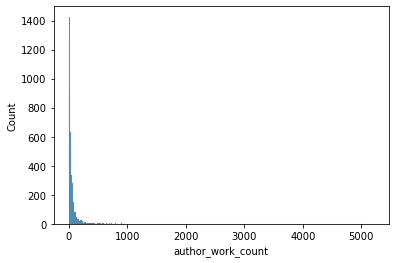

In [7]:
sns.histplot(data = hypo2, x = 'author_work_count')

In [8]:
hypo2['author_work_count'] = hypo2['author_work_count']+1

In [9]:
hypo2['author_work_count'].describe()

count    12724.000000
mean        73.610893
std        191.226178
min          1.000000
25%         11.000000
50%         27.000000
75%         63.000000
max       5205.000000
Name: author_work_count, dtype: float64

In [10]:
hypo2['log_author_work_count'] = np.log10(hypo2['author_work_count'])

<AxesSubplot:xlabel='log_author_work_count', ylabel='Count'>

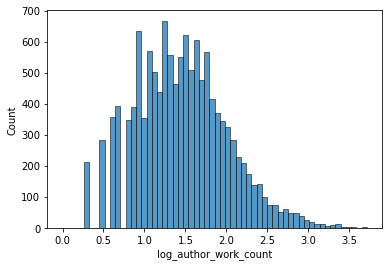

In [11]:
sns.histplot(data = hypo2, x = 'log_author_work_count')

In [12]:
def classify_work_count(x):
    if x <= 1.0:
        return('newbie')
    elif x > 1.0 and x < 1.5:
        return('budding')
    elif x >= 1.5 and x <= 2.0:
        return('experienced')
    else:
        return('legendary')

hypo2['bins'] = hypo2['log_author_work_count'].apply(func = lambda x: classify_work_count(x))

In [13]:
hypo2['bins']

author               author_sex
50 cent              male              budding
a. kirk              female            budding
a. manette ansay     female             newbie
a. meredith walters  female        experienced
a. merritt           male            legendary
                                      ...     
zoya pirzad          female            budding
zoya tessi           female             newbie
zuri day             female        experienced
zygmunt bauman       male            legendary
zyranna zateli       female            budding
Name: bins, Length: 12724, dtype: object

In [14]:
hypo2.to_csv('hypothesis2.csv')